<a href="https://colab.research.google.com/github/lin3372/100_datSci/blob/main/03_decision_trees/140_decision_tree_classification_(sklearn_codebasics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classification

Decision Tree Classification   [[codebasics github]](https://github.com/codebasics/py/tree/master/ML/9_decision_tree)        [[Youtube 15 min]](https://www.youtube.com/watch?v=PHxYNGo8NcI)

## Pre-requisite

### directory creation and cleanup, load lib, git clone

In [40]:
import os
import shutil

In [41]:
# mount google drive
'''
from google.colab import drive
drive.mount('/gdrive')
'''

"\nfrom google.colab import drive\ndrive.mount('/gdrive')\n"

In [42]:
os.getcwd()

'/content/03_decision_trees'

In [43]:
# https://github.com/codebasics/py.git
# py/ML/9_decision_tree/9_decision_tree.ipynb
SRC_LOC='/content/py/ML/9_decision_tree/'

SRC_FILES_DIRS = SRC_LOC + '*'
DST_LOC='/content/'
WORKING_DIR=DST_LOC+'03_decision_trees/'
!python --version

Python 3.7.12


In [44]:
shutil.rmtree('/content')
os.mkdir('/content')
os.mkdir(WORKING_DIR)

os.chdir("/content/")
CWD = os.getcwd()
print(f"CWD={CWD}")

if os.path.isdir('py'):
  shutil.rmtree('py')

!git clone https://github.com/codebasics/py

os.system('cp -R ' + SRC_FILES_DIRS + ' ' + WORKING_DIR) 

os.chdir(WORKING_DIR)

CWD=/content
Cloning into 'py'...
remote: Enumerating objects: 2873, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2873 (delta 33), reused 52 (delta 18), pack-reused 2801
Receiving objects: 100% (2873/2873), 196.64 MiB | 33.73 MiB/s, done.
Resolving deltas: 100% (1112/1112), done.
Checking out files: 100% (1388/1388), done.


## Decision Trees w/ Sklearn - **Data Preparation**

In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [47]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [48]:
target = df['salary_more_then_100k']

In [49]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [50]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [51]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [52]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [53]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [54]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## **Sklearn - DecisionTreeClassifier model**

In [55]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [56]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [57]:
model.score(inputs_n,target)

1.0

## **Visualize Decision Trees**

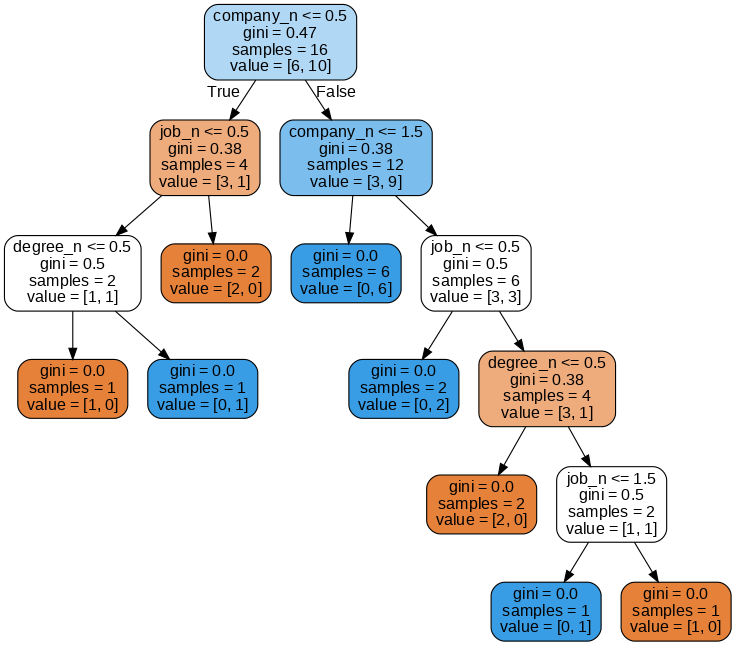

In [58]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot',feature_names=['company_n', 'job_n', 'degree_n'], rounded = True, proportion = False, precision = 2, filled = True)

'''
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
'''                

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=80'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## **Prediction with Decision Tree Classifications**

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [59]:
model.predict([[2,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [60]:
model.predict([[2,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

## **Exercise**: 
Build decision tree model to predict survival based on certain parameters

<img src="https://github.com/codebasics/py/raw/master/ML/9_decision_tree/titanic.jpg" width="600">

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

##### In this file using following columns build a model to predict if person would survive or not,

1. Pclass
1. Sex
1. Age
1. Fare

##### Calculate score of your model